# Gender Recognition via Voice
## Team Skepsis
### Members - Sagnik Mitra, Sneharup Mukherjee, Spandan Pal

## Algorithm used to Analyze the Data and Determining which will work the best for preparing the Model

* K-Nearest Neighbors  
* Naive Bayes  
* Decision Tree  
* Random Forest  
* XgBoost  
* Support Vector Machine  
* Neural Network

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [16]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [17]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing: label encoder and normalization

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [86]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,0.000000,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,0.000000,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,0.000000,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,0.299565,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,0.372362,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0
5,0.441173,0.631448,0.432029,0.274076,0.722901,0.534679,0.051782,0.004773,0.922681,0.870197,0.401984,0.441173,0.299699,0.037761,0.857144,0.098448,0.006452,0.124375,0.124464,0.134238,1.0
6,0.526061,0.578887,0.595932,0.375003,0.706098,0.413441,0.040161,0.002997,0.940728,0.900382,0.307846,0.526061,0.276701,0.084682,0.929285,0.159942,0.006452,0.242673,0.242847,0.132985,1.0
7,0.572113,0.602659,0.532916,0.446359,0.819942,0.449670,0.036301,0.002064,0.906544,0.847309,0.458300,0.572113,0.205893,0.041084,0.233218,0.099505,0.006452,0.024303,0.024320,0.304531,1.0
8,0.485814,0.615573,0.509942,0.356014,0.718545,0.445258,0.027701,0.001531,0.953672,0.910746,0.782511,0.485814,0.226085,0.042110,0.834600,0.111416,0.006452,0.098642,0.098712,0.159026,1.0
9,0.448457,0.639632,0.441466,0.304920,0.689783,0.470487,0.030322,0.002079,0.972260,0.952323,0.041781,0.448457,0.276351,0.049021,0.904450,0.112734,0.023656,0.214439,0.214235,0.096442,1.0


Visualization

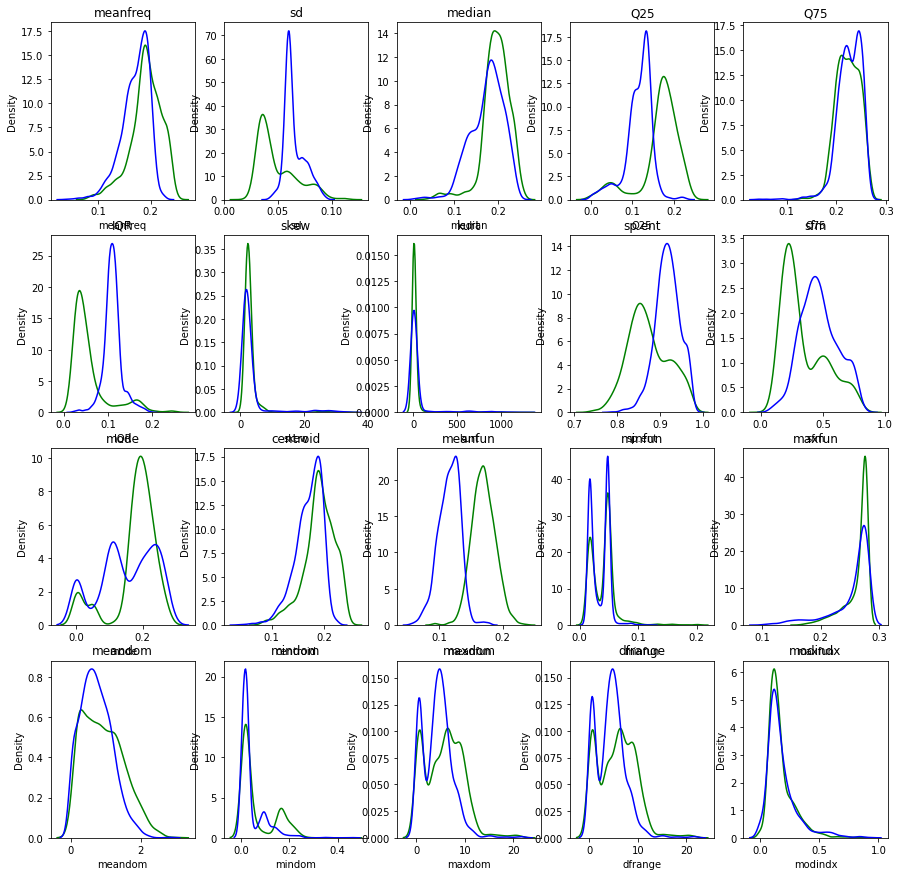

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [21]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [22]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2949,0.180954,0.037146,0.175718,0.160528,0.196657,0.036129,2.837804,11.970222,0.870433,0.229825,...,0.180954,0.156479,0.051282,0.275862,1.295037,0.164062,6.109375,5.945312,0.288190,0
2806,0.221882,0.048765,0.228119,0.218218,0.246337,0.028119,3.311551,16.026437,0.832175,0.266716,...,0.221882,0.185773,0.047619,0.279070,1.278363,0.023438,11.226562,11.203125,0.094250,0
3115,0.216332,0.039711,0.217312,0.186412,0.249101,0.062688,1.280790,3.845080,0.896799,0.175835,...,0.216332,0.152192,0.043193,0.277358,1.776678,0.021533,7.601221,7.579688,0.138880,0
1451,0.178987,0.057321,0.184317,0.148561,0.212014,0.063453,1.734397,5.721671,0.908007,0.407781,...,0.178987,0.127967,0.047151,0.275862,0.848575,0.023438,5.039062,5.015625,0.138077,1
219,0.185592,0.061366,0.205243,0.128673,0.237864,0.109191,1.245637,3.901684,0.924608,0.409220,...,0.185592,0.117565,0.015779,0.271186,0.384943,0.117188,0.601562,0.484375,0.358065,1


In [23]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [24]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [25]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    a = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:",a)
    return a
    
    

In [27]:
 
accli=pd.read_csv('Accuracy_List.csv')
accli.set_index("Algorithm", inplace = True)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = 0
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = 0
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = 0
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = 0
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = 0

accli


,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.0,0.0
Naïve Bayes,0.0,0.0
Decision Tree,0.0,0.0
Random Forest,0.0,0.0
XgBoost,0.0,0.0
Support Vector Machine,0.0,0.0
Neural Network (MLP Classifier),0.0,0.0


In [28]:
list = accli.index
list

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [29]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.26919032597266035 occurs at k=1.


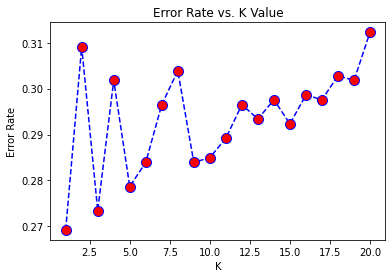

In [32]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [33]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['K-Nearest Neighbours', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.7253    0.7253    0.7253       466
        male     0.7361    0.7361    0.7361       485

    accuracy                         0.7308       951
   macro avg     0.7307    0.7307    0.7307       951
weighted avg     0.7308    0.7308    0.7308       951

Accuracy: 0.7308096740273397


Lowest error is 0.027339642481598318 occurs at k=8.


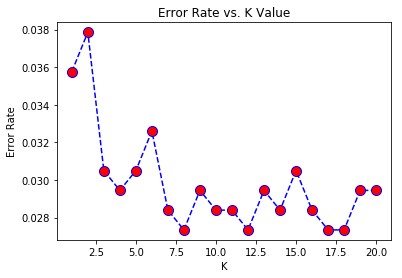

In [101]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [35]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['K-Nearest Neighbours', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9611    0.9549    0.9580       466
        male     0.9570    0.9629    0.9599       485

    accuracy                         0.9590       951
   macro avg     0.9590    0.9589    0.9590       951
weighted avg     0.9590    0.9590    0.9590       951

Accuracy: 0.9589905362776026


## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [36]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Naïve Bayes', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.8779    0.8798    0.8789       466
        male     0.8843    0.8825    0.8834       485

    accuracy                         0.8812       951
   macro avg     0.8811    0.8812    0.8811       951
weighted avg     0.8812    0.8812    0.8812       951

Accuracy: 0.8811777076761304


In [104]:
model=naive_bayes.GaussianNB()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Naïve Bayes', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9735    0.9696    0.9715       493
        male     0.9674    0.9716    0.9695       458

   micro avg     0.9706    0.9706    0.9706       951
   macro avg     0.9705    0.9706    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951

Accuracy: 0.9705573080967402


## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [37]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.03995793901156677 occurs at n=9.


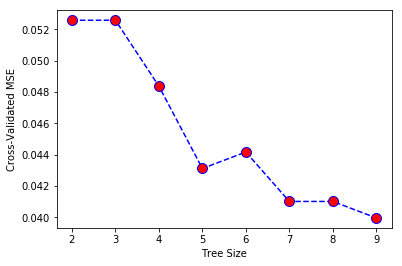

In [106]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [38]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
t = classify(pruned_tree,x_train,y_train,x_test,y_test)
accli.at['Decision Tree', 'Accuracy (considering all attributes)'] = t

NameError: name 'n' is not defined

Lowest error is 0.031545741324921134 occurs at n=10.


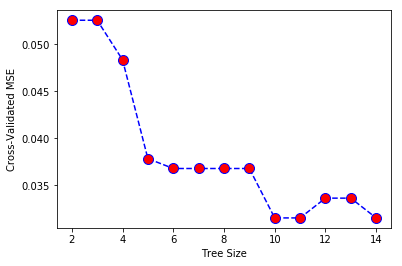

In [108]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [109]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
t = classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)
accli.at['Decision Tree', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9621    0.9777    0.9698       493
        male     0.9756    0.9585    0.9670       458

   micro avg     0.9685    0.9685    0.9685       951
   macro avg     0.9688    0.9681    0.9684       951
weighted avg     0.9686    0.9685    0.9684       951

Accuracy: 0.9684542586750788


## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [41]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.025236593059936908 occurs at n=61.


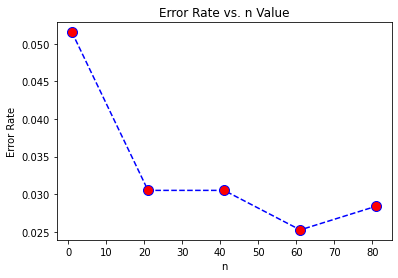

In [40]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [42]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Random Forest', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9641    0.9785    0.9712       466
        male     0.9791    0.9649    0.9720       485

    accuracy                         0.9716       951
   macro avg     0.9716    0.9717    0.9716       951
weighted avg     0.9717    0.9716    0.9716       951

Accuracy: 0.9716088328075709


Lowest error is 0.035751840168243953 occurs at n=61.


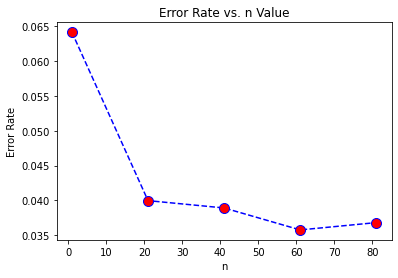

In [44]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [45]:
model=ensemble.RandomForestClassifier(n_estimators = e)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Random Forest', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9554    0.9657    0.9605       466
        male     0.9667    0.9567    0.9617       485

    accuracy                         0.9611       951
   macro avg     0.9610    0.9612    0.9611       951
weighted avg     0.9612    0.9611    0.9611       951

Accuracy: 0.961093585699264


## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [46]:
model = xgboost.XGBClassifier()
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['XgBoost', 'Accuracy (considering all attributes)'] = t

[03:52:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      female     0.9682    0.9807    0.9744       466
        male     0.9812    0.9691    0.9751       485

    accuracy                         0.9748       951
   macro avg     0.9747    0.9749    0.9748       951
weighted avg     0.9748    0.9748    0.9748       951

Accuracy: 0.9747634069400631


In [48]:
model = xgboost.XGBClassifier()
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['XgBoost', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

[03:52:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

      female     0.9517    0.9721    0.9618       466
        male     0.9726    0.9526    0.9625       485

    accuracy                         0.9621       951
   macro avg     0.9622    0.9623    0.9621       951
weighted avg     0.9624    0.9621    0.9621       951

Accuracy: 0.9621451104100947


## Support Vector Machine
Using svm.SVC() to build the model.

In [64]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [65]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [66]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.6725304465493911
rbf  out-of-sample accuracy in SVM:  0.6855941114616193
poly  in-sample accuracy in SVM:  0.519170049616599
poly  out-of-sample accuracy in SVM:  0.508937960042061
linear  in-sample accuracy in SVM:  0.9192602616147948
linear  out-of-sample accuracy in SVM:  0.9221871713985279
Highest accuracy is 0.9221871713985279 occurs at linear kernel.


Lowest error is 0.031545741324921134 occurs at C=4.


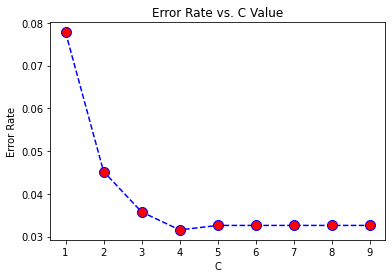

In [67]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [62]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Support Vector Machine', 'Accuracy (considering all attributes)'] = t

NameError: name 'c' is not defined

In [61]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9760938204781235
rbf  out-of-sample accuracy in SVM:  0.9621451104100947
poly  in-sample accuracy in SVM:  0.9738385205232296
poly  out-of-sample accuracy in SVM:  0.9652996845425867
linear  in-sample accuracy in SVM:  0.9197113216057735
linear  out-of-sample accuracy in SVM:  0.9106203995793901
Highest accuracy is 0.9652996845425867 occurs at poly kernel.


In [63]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

NameError: name 'svm_error' is not defined

In [59]:
model=svm.SVC(kernel=k,C=c)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Support Vector Machine', 'Accuracy (considering only IQR, meanfun & Q25)'] = t


NameError: name 'c' is not defined

## Neural Network
Using neural_network.MLPClassifier to build the model.

In [58]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.019978969505783387 occurs at C=13.


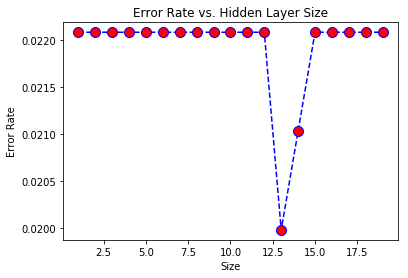

In [126]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [127]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train,y_train,x_test,y_test)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering all attributes)'] = t

              precision    recall  f1-score   support

      female     0.9817    0.9797    0.9807       493
        male     0.9782    0.9803    0.9793       458

   micro avg     0.9800    0.9800    0.9800       951
   macro avg     0.9800    0.9800    0.9800       951
weighted avg     0.9800    0.9800    0.9800       951

Accuracy: 0.9800210304942166


Lowest error is 0.029442691903259727 occurs at C=6.


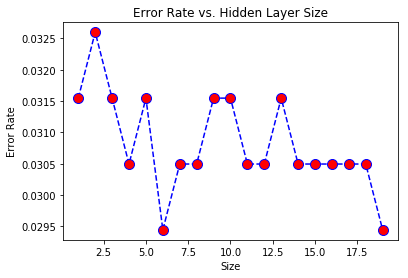

In [128]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [129]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
t = classify(model,x_train3,y_train3,x_test3,y_test3)
accli.at['Neural Network (MLP Classifier)', 'Accuracy (considering only IQR, meanfun & Q25)'] = t

              precision    recall  f1-score   support

      female     0.9716    0.9716    0.9716       493
        male     0.9694    0.9694    0.9694       458

   micro avg     0.9706    0.9706    0.9706       951
   macro avg     0.9705    0.9705    0.9705       951
weighted avg     0.9706    0.9706    0.9706       951

Accuracy: 0.9705573080967402


In [130]:
accli

,"Accuracy (considering only IQR, meanfun & Q25)",Accuracy (considering all attributes)
Algorithm,,
K-Nearest Neighbours,0.972660,0.982124
Naïve Bayes,0.970557,0.894848
Decision Tree,0.968454,0.960042
Random Forest,0.973712,0.980021
XgBoost,0.967403,0.977918
Support Vector Machine,0.973712,0.977918
Neural Network (MLP Classifier),0.970557,0.980021


In [131]:
print(accli.index)

Index(['K-Nearest Neighbours', 'Naïve Bayes', 'Decision Tree', 'Random Forest',
       'XgBoost', 'Support Vector Machine', 'Neural Network (MLP Classifier)'],
      dtype='object', name='Algorithm')


In [ ]:
# importing pandas library 
import pandas as pd 
# import matplotlib library 
import matplotlib.pyplot as plt 
%matplotlib inline
accli.plot(x='Algorithm', y=['Accuracy (considering only IQR, meanfun & Q25)','Accuracy (considering all attributes)'], kind="bar") 

KeyError: 'Algorithm'